In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For this Project i am using Stack Overflow's developer survey data from 2020.

In [3]:
df = pd.read_csv('data/survey_results_public.csv')

## Data Understanding

In [4]:
df.shape

(64461, 61)

In [5]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [6]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [7]:
df['Country'].value_counts()

United States                                12469
India                                         8403
United Kingdom                                3896
Germany                                       3890
Canada                                        2191
France                                        1898
Brazil                                        1818
Netherlands                                   1343
Poland                                        1278
Australia                                     1208
Spain                                         1161
Italy                                         1117
Russian Federation                            1092
Sweden                                         886
Pakistan                                       809
Turkey                                         777
Israel                                         653
Switzerland                                    629
Bangladesh                                     609
Romania                        

In [8]:
df[df['Country'] == 'India'].head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
6,7,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,United States dollar,USD,NaN,NaN,"Developer, back-end;Developer, front-end;Devel...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very satisfied,"I’m not actively looking, but I am open to new...",C#;HTML/CSS;PHP,C#;HTML/CSS;PHP,NaN,NaN,NaN,NaN,Yes,Extremely important,Very important,Better compensation;Growth or leadership oppor...,"Read company media, such as employee blogs or ...",Every few months,Yes,Yes,No,Sometimes: 1-2 days per month but less than we...,Start a free trial;Ask developers I know/work ...,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Windows,20 to 99 employees,NaN,NaN,NaN,NaN,Yes,"Yes, definitely",Multiple times per day,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,A lot more welcome now than last year,NaN,6,4
21,22,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,Indian rupee,INR,NaN,NaN,"Developer, full-stack;Engineer, data","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,Man,NaN,Slightly dissatisfied,I am actively looking for a job,Java;JavaScript;Python,Java;Python,NaN,NaN,NaN,NaN,Not sure,NaN,Very important,Better compensation;Better work/life balance;W...,Company reviews from third party sites (e.g. G...,Every few months,No,Yes,No,Often: 1-2 days per week or more,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Windows,500 to 999 employees,NaN,NaN,NaN,NaN,Yes,"Yes, definitely",Multiple times per day,Multiple times per day,Easy,Appropriate in length,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,50.0,10,2
57,58,I am a developer by profession,Yes,NaN,22,NaN,NaN,NaN,India,Indian rupee,INR,Microsoft SQL Server,Microsoft SQL Server,"Developer, back-end",NaN,"Independent contractor, freelancer, or self-em...",South Asian,NaN,Family friendliness,Very satisfied,I am not interested in new job opportunities,C#;JavaScript;SQL;TypeScript,C#;JavaScript;SQL;TypeScript,.NET;.NET Core;Node.js,.NET;.NET Core;Node.js,Stack Overflow for Teams,Stack Overflow for Teams,Yes,Extremely important,Very important,NaN,NaN,Once every few years,NaN,Yes,No,Often: 1-2 days per week or more,Ask developers I know/work with,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Call a coworker or friend;Visit Stack Overflow...,Windows,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, definitely",NaN,Multiple times per day,Neither easy nor difficult,Too long,NaN,Web development or web design,Angular;Angular.js;ASP.NET;ASP.NET Core;jQuery,Angular;Angular.js;ASP.NET;ASP.NET Core;jQuery,NaN,NaN,NaN,NaN
62,63,I am a student who is learning to code,Yes,21.0,17,NaN,NaN,NaN,India,NaN,NaN,DynamoDB,Firebase;MongoDB;MySQL,"Designer;Developer, back-end;Developer, front-...","Secondary school (e.g. American high school, G...","Not employed, but looking for work",South Asian,Man,Flex time or a flexible schedule;How widely us...,NaN,I am actively looking for a job,Go;Kotlin;TypeScript,C;C++;HTML/CSS;Java;JavaScript;Python,Flutter;Node.js;React Native;TensorFlow,NaN,Confluence;Stack Overflow for Teams,Github

## Data Preparation

In [9]:
df.isnull().sum()

Respondent                          0
MainBranch                        299
Hobbyist                           45
Age                             19015
Age1stCode                       6561
CompFreq                        24392
CompTotal                       29635
ConvertedComp                   29705
Country                           389
CurrencyDesc                    18989
CurrencySymbol                  18989
DatabaseDesireNextYear          20391
DatabaseWorkedWith              14924
DevType                         15091
EdLevel                          7030
Employment                        607
Ethnicity                       18513
Gender                          13904
JobFactors                      15112
JobSat                          19267
JobSeek                         12734
LanguageDesireNextYear          10348
LanguageWorkedWith               7083
MiscTechDesireNextYear          22082
MiscTechWorkedWith              24147
NEWCollabToolsDesireNextYear    17174
NEWCollabToo

In [10]:
# In this project i will work on Survey data from India.
# I have a questions in my mind. Lets list down below.
"""
1. What is the age when most of the developers starts Programming in India.
2. Which Programming Language is mostly used by developers in India.
3. Which Programming Language Developers want to work next in India.
"""

'\n1. What is the age when most of the developers starts Programming in India.\n2. Which Programming Language is mostly used by developers in India.\n3. Which Programming Language Developers want to work next in India.\n'

In [11]:
india_data = df[df['Country'] == 'India']

In [12]:
# 1st Question

In [45]:
india_Age1stCode_data = india_data.dropna(subset=['Age1stCode'])

In [46]:
age_list = india_Age1stCode_data.Age1stCode.value_counts(normalize =True)

## Question 1: What is the age when most of the developers starts Programming in India.

In [47]:
def create_barplot(x_data, y_data, plot_title, x_label, y_label):
    """this method takes data points and labels as argument and creates a barplot."""
    plt.figure(figsize=(10,5))
    sns.barplot(x_data, y_data, alpha=0.8)
    plt.title(plot_title)
    plt.ylabel(x_label, fontsize=12)
    plt.xlabel(y_label, fontsize=12)
    plt.show()

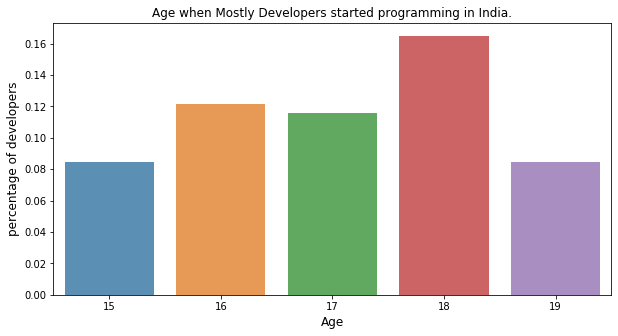

In [48]:
create_barplot(age_list[:5].index, age_list[:5].values, 'Age when Mostly Developers started programming in India.', 'percentage of developers', 'Age')

In [49]:
# 2nd Question

In [16]:
type(india_data['LanguageWorkedWith'][6])

str

## Question 2: Which Programming Language is mostly used by developers in India.

In [17]:
india_data['LanguageWorkedWith'] = india_data['LanguageWorkedWith'].astype('str')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
india_data['Programming_lang_worked'] = india_data['LanguageWorkedWith'].apply(lambda x : x.split(';'))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
india_data['Programming_lang_worked'].isnull().sum()

0

In [19]:
india_data['Programming_lang_worked'].head(20)

6                                    [C#, HTML/CSS, PHP]
21                                        [Java, Python]
57                     [C#, JavaScript, SQL, TypeScript]
62          [C, C++, HTML/CSS, Java, JavaScript, Python]
147                   [Bash/Shell/PowerShell, C++, Perl]
175                                 [Objective-C, Swift]
225                           [Java, JavaScript, Python]
230    [C, C++, HTML/CSS, Java, JavaScript, Python, VBA]
232    [C, C++, HTML/CSS, Java, JavaScript, PHP, Pyth...
266               [HTML/CSS, Java, JavaScript, PHP, SQL]
272                   [HTML/CSS, JavaScript, TypeScript]
277    [Bash/Shell/PowerShell, C++, HTML/CSS, JavaScr...
320         [HTML/CSS, JavaScript, PHP, SQL, TypeScript]
362    [Assembly, Bash/Shell/PowerShell, C, C#, C++, ...
374            [Bash/Shell/PowerShell, HTML/CSS, Python]
405    [Bash/Shell/PowerShell, C++, Java, JavaScript,...
412                                   [Python, R, Scala]
472                    [HTML/CS

In [20]:
Programming_lang_list = list()
for lang_list in india_data['Programming_lang_worked']:
    for lang in lang_list:
        Programming_lang_list.append(lang)

In [21]:
from wordcloud import WordCloud

In [42]:
def create_wordcloud(data):
    """ this method takes list of data and creates a wordcloud for visualization."""
    wordcloud = WordCloud(width = 600, height = 400, background_color ='white').generate(" ".join(data))
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

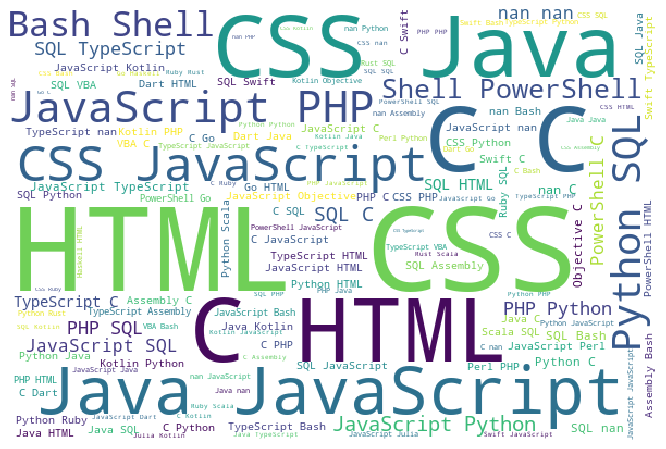

In [40]:
create_wordcloud(Programming_lang_list)

In [23]:
from collections import Counter

In [24]:
programming_lang_worked = pd.Series(dict(Counter(Programming_lang_list))).sort_values(ascending =False)

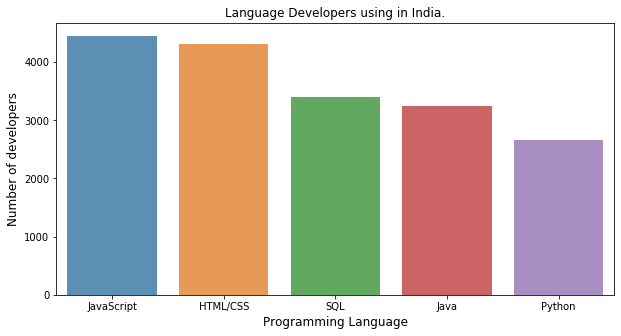

In [35]:
create_barplot(programming_lang_worked[:5].index, programming_lang_worked[:5].values, 'Language Developers using in India.', 'Number of developers', 'Programming Language')

## Question 3: Which Programming Language Developers want to work next in India.

In [26]:
india_data['LanguageDesireNextYear'] = india_data['LanguageDesireNextYear'].astype('str')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
india_data['lang_desired_next'] = india_data['LanguageDesireNextYear'].apply(lambda x : x.split(';'))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
india_data['lang_desired_next'].isnull().sum()

0

In [28]:
desired_lang_list = list()
for lang_list in india_data['lang_desired_next']:
    for lang in lang_list:
        desired_lang_list.append(lang)

In [29]:
desired_lang_final_list = pd.Series(dict(Counter(desired_lang_list))).sort_values(ascending =False)

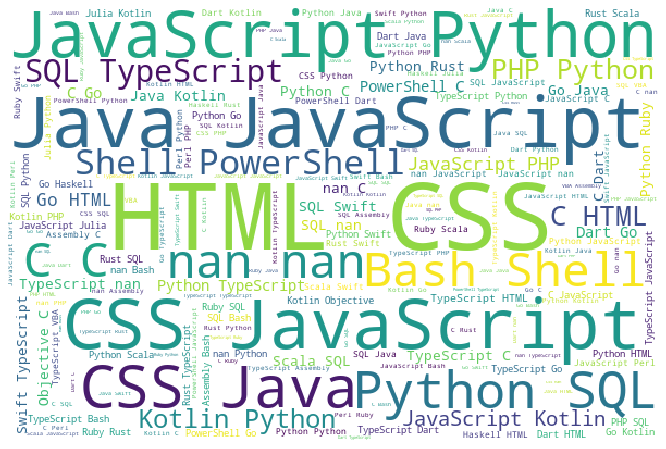

In [41]:
create_wordcloud(desired_lang_list)

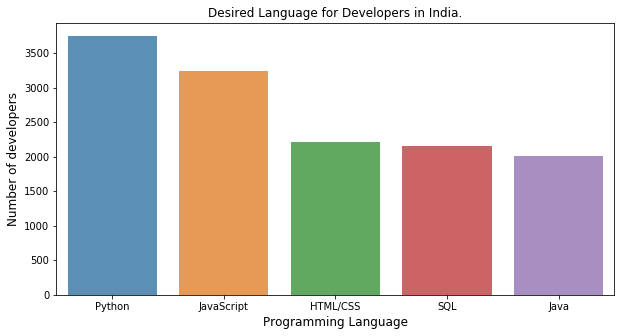

In [36]:
create_barplot(desired_lang_final_list[:5].index, desired_lang_final_list[:5].values, 'Desired Language for Developers in India.', 'Number of developers', 'Programming Language')

In [52]:
# You can find a blog on this EDA here:
